# Regular expressions and word tokenization
> This chapter will introduce some basic NLP concepts, such as word tokenization and regular expressions to help parse text. You'll also learn how to handle non-English text and more difficult tokenization you might find. This is the Summary of lecture "Introduction to Natural Language Processing in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Natural_Language_Processing]
- image: images/line_num_words.png

In [1]:
import re
from pprint import pprint

## Introduction to regular expressions
- Regular expressions
    - Strings with a special syntax
    - Allow us to match patterns in other strings
    - Applications of regular expressions
        - Find all web links in a document
        - Parse email addresses, remove/replace unwanted characters
- Common Regex patterns

| pattern | matches | examples |
| ------- | ------- | -------- |
| \w+ | word | 'Magic' |
| \d | digit | 9 |
| \s | space | '' |
| .* | wildcard | 'username74' |
| + or * | greedy match | 'aaaaaaa' |
| \S | not space | 'no_spaces' |
| [a-z] | lowercase group | 'abcdfg' |

- Python's re Module
    - `split`: split a string on regex
    - `findall`: find all patterns in a string
    - `search`: search for a pattern
    - `match`: match an entire string or substring based on a pattern
    - Pattern first, and the string second
    - May return an iterator, string, or match object

In [2]:
my_string = "Let's write RegEx!"
PATTERN = r"\w+"
re.findall(PATTERN, my_string)

['Let', 's', 'write', 'RegEx']

### Practicing regular expressions - re.split() and re.findall()
Now you'll get a chance to write some regular expressions to match digits, strings and non-alphanumeric characters. Take a look at `my_string` first by printing it in the IPython Shell, to determine how you might best match the different steps.

Note: It's important to prefix your regex patterns with `r` to ensure that your patterns are interpreted in the way you want them to. Else, you may encounter problems to do with escape sequences in strings. For example, `"\n"` in Python is used to indicate a new line, but if you use the `r` prefix, it will be interpreted as the raw string `"\n"` - that is, the character `"\"` followed by the character `"n"` - and not as a new line.

Remember from the video that the syntax for the regex library is to always to pass the **pattern first**, and then the **string second**.

In [3]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

In [4]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capicalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


## Introduction to tokenization
- Tokenization
    - Turning a string or document into **tokens** (smaller chunks)
    - One step in preparing a text for NLP
    - Many different theories and rules
    - You can create your own rules using regular expressions
    - Some examples:
        - Breaking out words or sentences
        - Separating punctuation
        - Separating all hashtags in a tweet
- Why tokenize?
    - Easier to map part of speech
    - Matching common words
    - Removing unwanted tokens
- Other `nltk` tokenizers
    - `sent_tokenize`: tokenize a document into sentences
    - `regexp_tokenize`: tokenize a string or document based on a regular expression pattern
    - `TweetTokenizer`: special class just for tweet tokenization, allowing you to separate hashtags, mentions and lots of exclamation points

### Word tokenization with NLTK
Here, you'll be using the first scene of Monty Python's Holy Grail, which has been pre-loaded as `scene_one`.

Your job in this exercise is to utilize `word_tokenize` and `sent_tokenize` from `nltk.tokenize` to tokenize both words and sentences from Python strings - in this case, the first scene of Monty Python's Holy Grail.

> Note: Before using NLTK, you must install `punkt` package for tokenizer

In [5]:
with open('./dataset/grail.txt', 'r') as file:
    holy_grail = file.read()
    scene_one = re.split('SCENE 2:', holy_grail)[0]

In [6]:
scene_one

"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a t

In [7]:
from nltk.tokenize import word_tokenize, sent_tokenize

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

{'lord', 'bangin', 'strangers', 'swallows', 'them', 'right', 'KING', '!', 'goes', 'Ridden', 'Yes', 'snows', 'I', 'weight', 'matter', 'yeah', 'they', 'Supposing', 'where', 'all', "'s", 'simple', 'So', 'seek', 'line', 'who', 'swallow', 'beat', 'land', 'with', 'Mercea', 'from', 'get', 'No', 'one', 'second', 'sovereign', 'temperate', 'Oh', 'to', 'Camelot', ']', '1', 'bird', 'tell', 'an', 'are', 'our', 'servant', 'interested', '2', 'Patsy', 'am', "n't", 'got', 'must', 'England', 'Court', 'if', 'feathers', 'anyway', 'carrying', 'use', 'does', 'climes', 'back', 'carried', 'Wait', 'air-speed', 'velocity', '#', 'pound', 'on', "'d", 'found', 'European', 'of', 'every', 'ARTHUR', 'your', 'horse', 'these', 'not', 'that', 'You', 'since', 'times', 'agree', 'winter', 'yet', 'breadth', 'speak', 'carry', 'Well', 'wings', 'King', 'Listen', 'martin', 'kingdom', 'maybe', 'there', 'ask', 'master', 'creeper', 'will', 'maintain', 'ridden', 'here', 'then', 'the', 'Please', 'through', 'together', 'why', 'using'

### More regex with re.search()
In this exercise, you'll utilize `re.search()` and `re.match()` to find specific tokens. Both search and match expect regex patterns, similar to those you defined in an earlier exercise. You'll apply these regex library methods to the same Monty Python text from the `nltk` corpora.



In [8]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

580 588


In [9]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>


In [10]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 7), match='ARTHUR:'>


## Advanced tokenization with NLTK and regex
- Regex groups using or `|`
    - OR is represented using `|`
    - You can define a group using `()`
    - You can define explicit character ranges using `[]`
- Regex ranges and groups

| pattern | matches | example |
| ------- | ------- | ------- |
| [A-Za-z]+ | upper and lowercase English alphabet | 'ABCDEFghijk' |
| [0-9] | numbers from 0 to 9 | 9 |
| [A-Za-z\-\.]+ | upper and lowercase English alphabet, - and . | 'My-Website.com' |
| (a-z) | a, - and z | 'a-z' |
| (\s+|,) | spaces or a comma | ', ' |

### Choosing a tokenizer
Given the following string, which of the below patterns is the best tokenizer? If possible, you want to retain sentence punctuation as separate tokens, but have `'#1'` remain a single token.
```python
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"
```

Additionally, `regexp_tokenize` has been imported from `nltk.tokenize`. You can use `regexp_tokenize(string, pattern)` with `my_string` and one of the patterns as arguments to experiment for yourself and see which is the best tokenizer.

In [11]:
from nltk.tokenize import regexp_tokenize

my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

pattern1 = r'(\\w+|\\?|!)'
pattern2 = r"(\w+|#\d|\?|!)"
pattern3 = r'(#\\d\\w+\\?!)'
pattern4 = r'\\s+'

In [12]:
pprint(regexp_tokenize(my_string, pattern2))

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']


### Regex with NLTK tokenization
Twitter is a frequently used source for NLP text and tasks. In this exercise, you'll build a more complex tokenizer for tweets with hashtags and mentions using nltk and regex. The `nltk.tokenize.TweetTokenizer` class gives you some extra methods and attributes for parsing tweets.

Here, you're given some example tweets to parse using both `TweetTokenizer` and `regexp_tokenize` from the `nltk.tokenize` module. 

Unlike the syntax for the regex library, with `nltk_tokenize()` you pass the pattern as the second argument.

In [13]:
tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

In [14]:
from nltk.tokenize import regexp_tokenize, TweetTokenizer

# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

['#nlp', '#python']


In [15]:
# write a pattern that matches both mentions (@) and hashtags
pattern2 = r"[@|#]\w+"

# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


In [16]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


### Non-ascii tokenization
In this exercise, you'll practice advanced tokenization by tokenizing some non-ascii based text. You'll be using German with emoji!

Here, you have access to a string called `german_text`, which has been printed for you in the Shell. Notice the emoji and the German characters!

Unicode ranges for emoji are:

`('\U0001F300'-'\U0001F5FF')`, `('\U0001F600-\U0001F64F')`, `('\U0001F680-\U0001F6FF')`, and `('\u2600'-\u26FF-\u2700-\u27BF')`.

In [17]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [18]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


## Charting word length with NLTK


### Charting practice
Try using your new skills to find and chart the number of words per line in the script using matplotlib. The Holy Grail script is loaded for you, and you need to use regex to find the words per line.

Using list comprehensions here will speed up your computations. For example: `my_lines = [tokenize(l) for l in lines]` will call a function tokenize on each line in the list lines. The new transformed list will be saved in the `my_lines` variable.

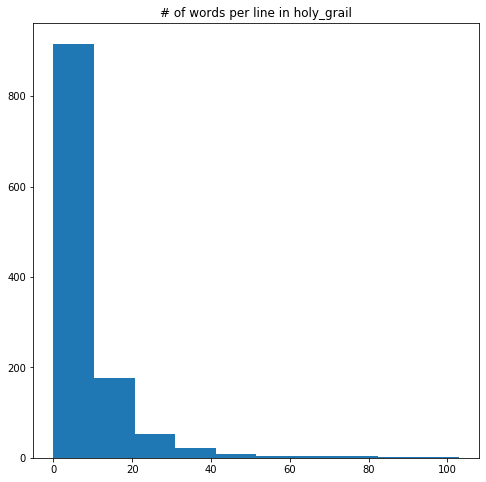

In [20]:
import matplotlib.pyplot as plt

# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, '\w+') for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.figure(figsize=(8,8))
plt.hist(line_num_words);
plt.title('# of words per line in holy_grail');